In [37]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
import pandas as pd

path = "/nfs/dust/belle2/user/axelheim/steeringFiles_basf2/mySteeringFile_1stAttempt/"
file = uproot.open(path + "merged_B+2_D-_2pi+.root")
file.keys()

[b'tree;1']

In [38]:
file.classnames()

[(b'tree;1', 'TTree')]

In [39]:
file["tree;1"]

<TTree b'tree' at 0x2b1721108f60>

In [40]:
events = file["tree"]
events.show()

__experiment__             (no streamer)              asdtype('>i4')
__run__                    (no streamer)              asdtype('>i4')
__event__                  (no streamer)              asdtype('>i4')
__candidate__              (no streamer)              asdtype('>i4')
__ncandidates__            (no streamer)              asdtype('>i4')
__weight__                 (no streamer)              asdtype('>f8')
Mbc                        (no streamer)              asdtype('>f8')
deltaE                     (no streamer)              asdtype('>f8')
px                         (no streamer)              asdtype('>f8')
py                         (no streamer)              asdtype('>f8')
pz                         (no streamer)              asdtype('>f8')
pt                         (no streamer)              asdtype('>f8')
p                          (no streamer)              asdtype('>f8')
E                          (no streamer)              asdtype('>f8')
mcE                        (no str

In [13]:
#events["Mbc"].array()

In [31]:
len(events["Mbc"].array())

8262013

/afs/desy.de/user/a/axelheim/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/afs/desy.de/user/a/axelheim/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


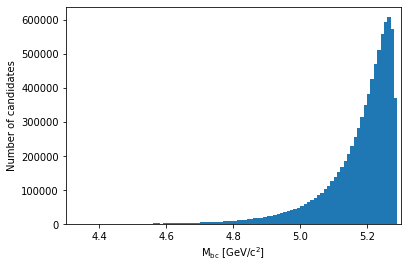

In [32]:
plt.hist(events["Mbc"].array(), bins=100, range=(4.3, 5.3))
plt.xlabel(r'M$_{\rm bc}$ [GeV/c$^{2}$]')
plt.ylabel('Number of candidates')
plt.xlim(4.3, 5.3)
plt.savefig('Mbc_all.png')

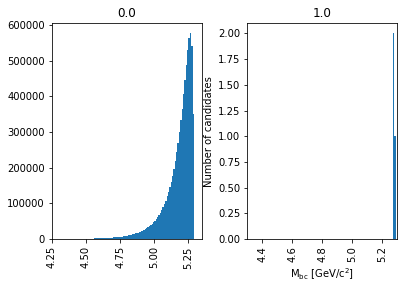

In [33]:
df = pd.DataFrame(
{"Mbc" : events["Mbc"].array(),
"isSignal" :  events["isSignal"].array()})

df.hist('Mbc', bins=100, range=(4.3, 5.3), by='isSignal')
plt.xlabel(r'M$_{\rm bc}$ [GeV/c$^{2}$]')
plt.ylabel('Number of candidates')
plt.xlim(4.3, 5.3)
plt.savefig('Mbc_all.png')

In [29]:
events["isSignal"].array()

<Array [0, 0, 0, 0, 0, 0, ... 0, 0, 0, 0, 0, 0] type='219788 * float64'>

In [36]:
sum(events["isSignal"].array() == 1.0)

3

In [41]:
events.show()

__experiment__             (no streamer)              asdtype('>i4')
__run__                    (no streamer)              asdtype('>i4')
__event__                  (no streamer)              asdtype('>i4')
__candidate__              (no streamer)              asdtype('>i4')
__ncandidates__            (no streamer)              asdtype('>i4')
__weight__                 (no streamer)              asdtype('>f8')
Mbc                        (no streamer)              asdtype('>f8')
deltaE                     (no streamer)              asdtype('>f8')
px                         (no streamer)              asdtype('>f8')
py                         (no streamer)              asdtype('>f8')
pz                         (no streamer)              asdtype('>f8')
pt                         (no streamer)              asdtype('>f8')
p                          (no streamer)              asdtype('>f8')
E                          (no streamer)              asdtype('>f8')
mcE                        (no str

In [49]:
num_combinations = len(events["Mbc"].array())
FSPs = ["K_p","pim_1","pim_2","pip_1","pip_2"]
variables = ["px","py","pz","E","kaonID","pionID"]

data = np.zeros((num_combinations, len(FSPs), len(variables)))

for i in range(len(FSPs)):
    FSP = FSPs[i]
    for j in range(len(variables)):
        var = variables[j]
        identifier = FSP + "_" + var
        #print(identifier)
        data[:,i,j] = events[identifier].array()
        

In [57]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

for i in range(0,1000,100):
    print(data[i,:])
    print("\n")


[[-0.7296 -0.1875  0.0695  0.9034  0.      1.    ]
 [-0.5808 -0.2598  0.1405  0.6664  0.      1.    ]
 [-0.0599 -0.0807  0.1056  0.2018  0.      0.1929]
 [ 0.1646  0.3201  0.4611  0.6014  0.      0.8947]
 [ 0.0709  0.4775  0.1362  0.5207  0.      1.    ]]


[[-0.135  -0.8667  1.7644  2.0313  0.      0.9935]
 [-0.0411 -0.1564  0.5209  0.563   0.2308  0.2308]
 [ 0.3844  0.0105  0.9912  1.0723  0.      0.8365]
 [-0.2598  0.0936  0.4068  0.5111  0.003   0.3495]
 [ 0.2246  0.2095 -0.1124  0.3556  0.      0.9935]]


[[-0.4438 -0.3003  1.1713  1.3794  0.      0.579 ]
 [ 0.2807  0.2472 -0.3497  0.5308  0.      0.5853]
 [ 0.2979 -0.2024  0.1925  0.4316  0.      0.9999]
 [-0.2598  0.0936  0.4068  0.5111  0.003   0.3495]
 [-0.3555  0.2273  0.47    0.6468  0.      0.5622]]


[[ 0.2301  0.2143 -0.115   0.5965  0.      0.9935]
 [ 0.2807  0.2472 -0.3497  0.5308  0.      0.5853]
 [ 0.7213 -0.0123  0.6571  0.9857  0.      1.    ]
 [-0.4438 -0.3002  1.1712  1.2955  0.      0.579 ]
 [-0.3555  0.2273  0.4